## Feature Engineering

Before modeling, data preparation and preprocessing were performed to further refine the data and enhance the performance and results of the model later on.
- Additional features: average transaction amount was added and tagging for churn (binary) was fixed
- Highly correlated independent variables were dropped
- One-hot encoding was performed for all categorical features

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.0)
pd.set_option('display.max_columns', 50)

%matplotlib inline

## Import Dataset

In [ ]:
df = pd.read_csv('BankChurners.csv')
df = df[df.columns[:-2]]
print(df.columns)
df.head()

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Data Preparation and Feature Engineering

### Change Column Names to Match Conventions

In [ ]:
# change column names to lowercase
df = df.rename(columns=str.lower)

# change CLIENTNUM to client_no
df.rename(columns = {'clientnum':'client_no'}, inplace = True)

# check if changes were applied
df.columns

Index(['client_no', 'attrition_flag', 'customer_age', 'gender',
       'dependent_count', 'education_level', 'marital_status',
       'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype='object')

### Change Data Types for all Transaction Features (Decimal)

In [ ]:
convert_to_float = lambda x: round(float(x), 2)
# transaction related features
for col in ['credit_limit', 'total_revolving_bal', 'avg_open_to_buy', 'total_trans_amt']:
  df[col] = df[col].apply(convert_to_float)

df.head()

,client_no,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777.0,11914.0,1.335,1144.0,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864.0,7392.0,1.541,1291.0,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0.0,3418.0,2.594,1887.0,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517.0,796.0,1.405,1171.0,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0.0,4716.0,2.175,816.0,28,2.500,0.000


### Churn Tagging

In [ ]:
# change attrition flag to binary values - 0 and 1
df['churned'] = df['attrition_flag'].apply(lambda x : 0 if x == 'Existing Customer' else 1)

# drop column attrition_flag since it was already converted to 0 and 1
df.drop('attrition_flag', axis=1, inplace = True)

# check dataframe
df.head()

,client_no,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,churned
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777.0,11914.0,1.335,1144.0,42,1.625,0.061,0
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864.0,7392.0,1.541,1291.0,33,3.714,0.105,0
2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0.0,3418.0,2.594,1887.0,20,2.333,0.000,0
3,769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517.0,796.0,1.405,1171.0,20,2.333,0.760,0
4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0.0,4716.0,2.175,816.0,28,2.500,0.000,0


### Handling Highly Correlated Features

Columns found with high correlation:
1. Months_on_book and Customer_Age - drop Customer_Age as no significant patterns were found for churned/existing customers' age on EDA
2. Avg_Open_To_Buy and Credit_Limit - drop Credit_Limit as this is fixed per month, more info on credit utilization if we use Avg_Open_To_Buy
3. Total_Trans_Ct and Total_Trans_Amt - create a new column, Average_Trans_Amt, to capture the amount spent per transaction

In [ ]:
# compute for average transaction
df['average_trans_amt'] = df['total_trans_amt']/df['total_trans_ct']

# drop customer age and credit limit
df = df.drop(['customer_age', 'credit_limit'], axis=1)
df.head()

,client_no,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,churned,average_trans_amt
0,768805383,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,777.0,11914.0,1.335,1144.0,42,1.625,0.061,0,27.238095
1,818770008,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,864.0,7392.0,1.541,1291.0,33,3.714,0.105,0,39.121212
2,713982108,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,0.0,3418.0,2.594,1887.0,20,2.333,0.000,0,94.350000
3,769911858,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,2517.0,796.0,1.405,1171.0,20,2.333,0.760,0,58.550000
4,709106358,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,0.0,4716.0,2.175,816.0,28,2.500,0.000,0,29.142857


### Transform Categorical Features

In [ ]:
# one-hot encoding for categorical features
# select categorical features only
df_cat = df.select_dtypes(include=['object'])
df_cat_encoded = pd.get_dummies(df_cat)

# drop features generated with unknown tagging
df_cat_encoded = df_cat_encoded.drop(['education_level_Unknown', # Unknowns are not actual values - tagged as 0
                                      'marital_status_Unknown',
                                      'income_category_Unknown',
                                      'gender_M' # dropping this column as it has -1 corr. coeff. with Gender_F
                                     ], axis=1)
# final encoded feature list
df_cat_encoded.head()

,gender_F,education_level_College,education_level_Doctorate,education_level_Graduate,education_level_High School,education_level_Post-Graduate,education_level_Uneducated,marital_status_Divorced,marital_status_Married,marital_status_Single,income_category_$120K +,income_category_$40K - $60K,income_category_$60K - $80K,income_category_$80K - $120K,income_category_Less than $40K,card_category_Blue,card_category_Gold,card_category_Platinum,card_category_Silver
0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
2,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0


In [ ]:
# join encoded columns to original df, drop all categorical columns
final_df = pd.concat([df, df_cat_encoded], axis=1).drop(df_cat.columns, axis=1)

# drop other columns that we don't get any information on
final_df = final_df.drop(['client_no'], axis=1)

# check final dataframe
final_df.head()

,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,churned,average_trans_amt,gender_F,education_level_College,education_level_Doctorate,education_level_Graduate,education_level_High School,education_level_Post-Graduate,education_level_Uneducated,marital_status_Divorced,marital_status_Married,marital_status_Single,income_category_$120K +,income_category_$40K - $60K,income_category_$60K - $80K,income_category_$80K - $120K,income_category_Less than $40K,card_category_Blue,card_category_Gold,card_category_Platinum,card_category_Silver
0,3,39,5,1,3,777.0,11914.0,1.335,1144.0,42,1.625,0.061,0,27.238095,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,5,44,6,1,2,864.0,7392.0,1.541,1291.0,33,3.714,0.105,0,39.121212,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
2,3,36,4,1,0,0.0,3418.0,2.594,1887.0,20,2.333,0.000,0,94.350000,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
3,4,34,3,4,1,2517.0,796.0,1.405,1171.0,20,2.333,0.760,0,58.550000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,3,21,5,1,0,0.0,4716.0,2.175,816.0,28,2.500,0.000,0,29.142857,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


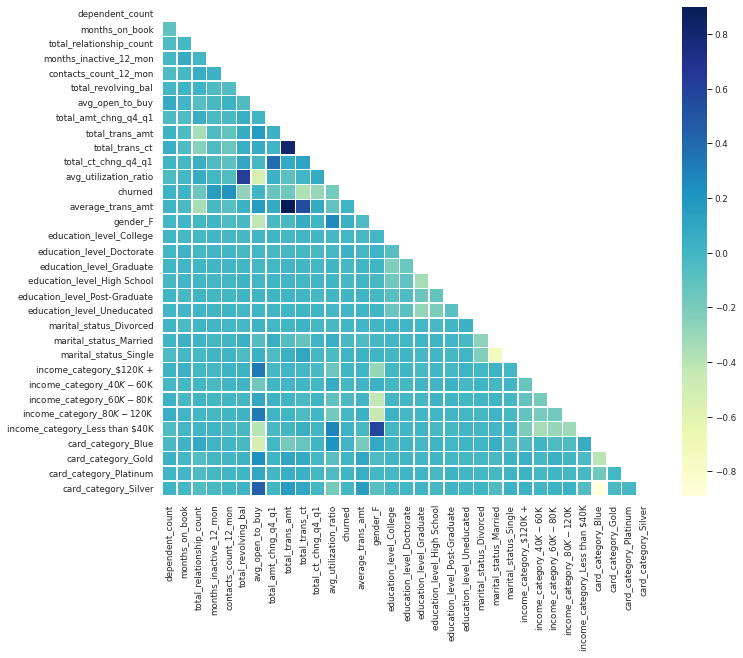

In [ ]:
# check correlation matrix before modeling
corrmat = final_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the correct aspect ratio
sns.heatmap(corrmat, mask=mask, cmap="YlGnBu", vmax=.9, square=True, linewidths=.5, ax=ax);

## Check Final Dataframe for Modeling

In [ ]:
print(final_df.columns)
final_df

Index(['dependent_count', 'months_on_book', 'total_relationship_count',
       'months_inactive_12_mon', 'contacts_count_12_mon',
       'total_revolving_bal', 'avg_open_to_buy', 'total_amt_chng_q4_q1',
       'total_trans_amt', 'total_trans_ct', 'total_ct_chng_q4_q1',
       'avg_utilization_ratio', 'churned', 'average_trans_amt', 'gender_F',
       'education_level_College', 'education_level_Doctorate',
       'education_level_Graduate', 'education_level_High School',
       'education_level_Post-Graduate', 'education_level_Uneducated',
       'marital_status_Divorced', 'marital_status_Married',
       'marital_status_Single', 'income_category_$120K +',
       'income_category_$40K - $60K', 'income_category_$60K - $80K',
       'income_category_$80K - $120K', 'income_category_Less than $40K',
       'card_category_Blue', 'card_category_Gold', 'card_category_Platinum',
       'card_category_Silver'],
      dtype='object')


,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,churned,average_trans_amt,gender_F,education_level_College,education_level_Doctorate,education_level_Graduate,education_level_High School,education_level_Post-Graduate,education_level_Uneducated,marital_status_Divorced,marital_status_Married,marital_status_Single,income_category_$120K +,income_category_$40K - $60K,income_category_$60K - $80K,income_category_$80K - $120K,income_category_Less than $40K,card_category_Blue,card_category_Gold,card_category_Platinum,card_category_Silver
0,3,39,5,1,3,777.0,11914.0,1.335,1144.0,42,1.625,0.061,0,27.238095,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,5,44,6,1,2,864.0,7392.0,1.541,1291.0,33,3.714,0.105,0,39.121212,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
2,3,36,4,1,0,0.0,3418.0,2.594,1887.0,20,2.333,0.000,0,94.350000,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
3,4,34,3,4,1,2517.0,796.0,1.405,1171.0,20,2.333,0.760,0,58.550000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,3,21,5,1,0,0.0,4716.0,2.175,816.0,28,2.500,0.000,0,29.142857,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,2,40,3,2,3,1851.0,2152.0,0.703,15476.0,117,0.857,0.462,0,132.273504,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
10123,2,25,4,2,3,2186.0,2091.0,0.804,8764.0,69,0.683,0.511,1,127.014493,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
10124,1,36,5,3,4,0.0,5409.0,0.819,10291.0,60,0.818,0.000,1,171.516667,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0
10125,2,36,4,3,3,0.0,5281.0,0.535,8395.0,62,0.722,0.000,1,135.403226,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


### Save as CSV file

In [ ]:
# save final df as csv
final_df.to_csv('bankchurners_final_df.csv')